# House Price Prediction Using Linear Regression with Manual Gradient Descent Calculation

Description:

Input: The dataset contains information about recorded properties, their features, and sale prices. Author: Alberto Marques
Objective: To create a model that predicts house prices.
Only one feature, "OverallQual," was used, applying both scikit-learn’s LinearRegression and manual calculations of cost, gradient, and gradient descent for comparison purposes.

Português

Entradas: dataset contém informações sobre imóveis registrados, características e seus preços de venda. Autoria: Alberto Marques
Objetivo: criar um modelo que faça previsão dos valores da casa. 
Foi utilizado 1 feature: "OverAllQual" com utilização de LinearRegression de scikitlearn e cálculos manuais  de cost, gradient e gradient descent para fins de comparação. 

In [50]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import math  # somente se usar math.ceil para controle de iterações no gradient descent
import matplotlib.cm as mcm  # library for colormap handling in plots
import matplotlib.pyplot as plt  # library for creating plots and visualizations
import numpy as np  # library for large-scale vector and matrix operations and general data manipulation

Defining functions

In [51]:
# compute_cost : calcular o custo(erro) do modelo
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost

In [52]:
# computar gradient linear
def compute_gradient(x, y, w, b): 
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray (m,)): Data, m examples 
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
     """
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [53]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function): 
    """
    Performs gradient descent to fit w,b. Updates w,b by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x (ndarray (m,))  : Data, m examples 
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters  
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient
      
    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b] 
      """
    
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters using gradient_function
        dj_dw, dj_db = gradient_function(x, y, w , b)     

        # Update Parameters using equation (3) above
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(x, y, w , b))
            p_history.append([w,b])
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history #return w and J,w history for graphing

In [54]:
# Loading dataset
dataframe = pd.read_csv('train.csv')

In [55]:
dataframe

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Heatmap: to check correlation with the target

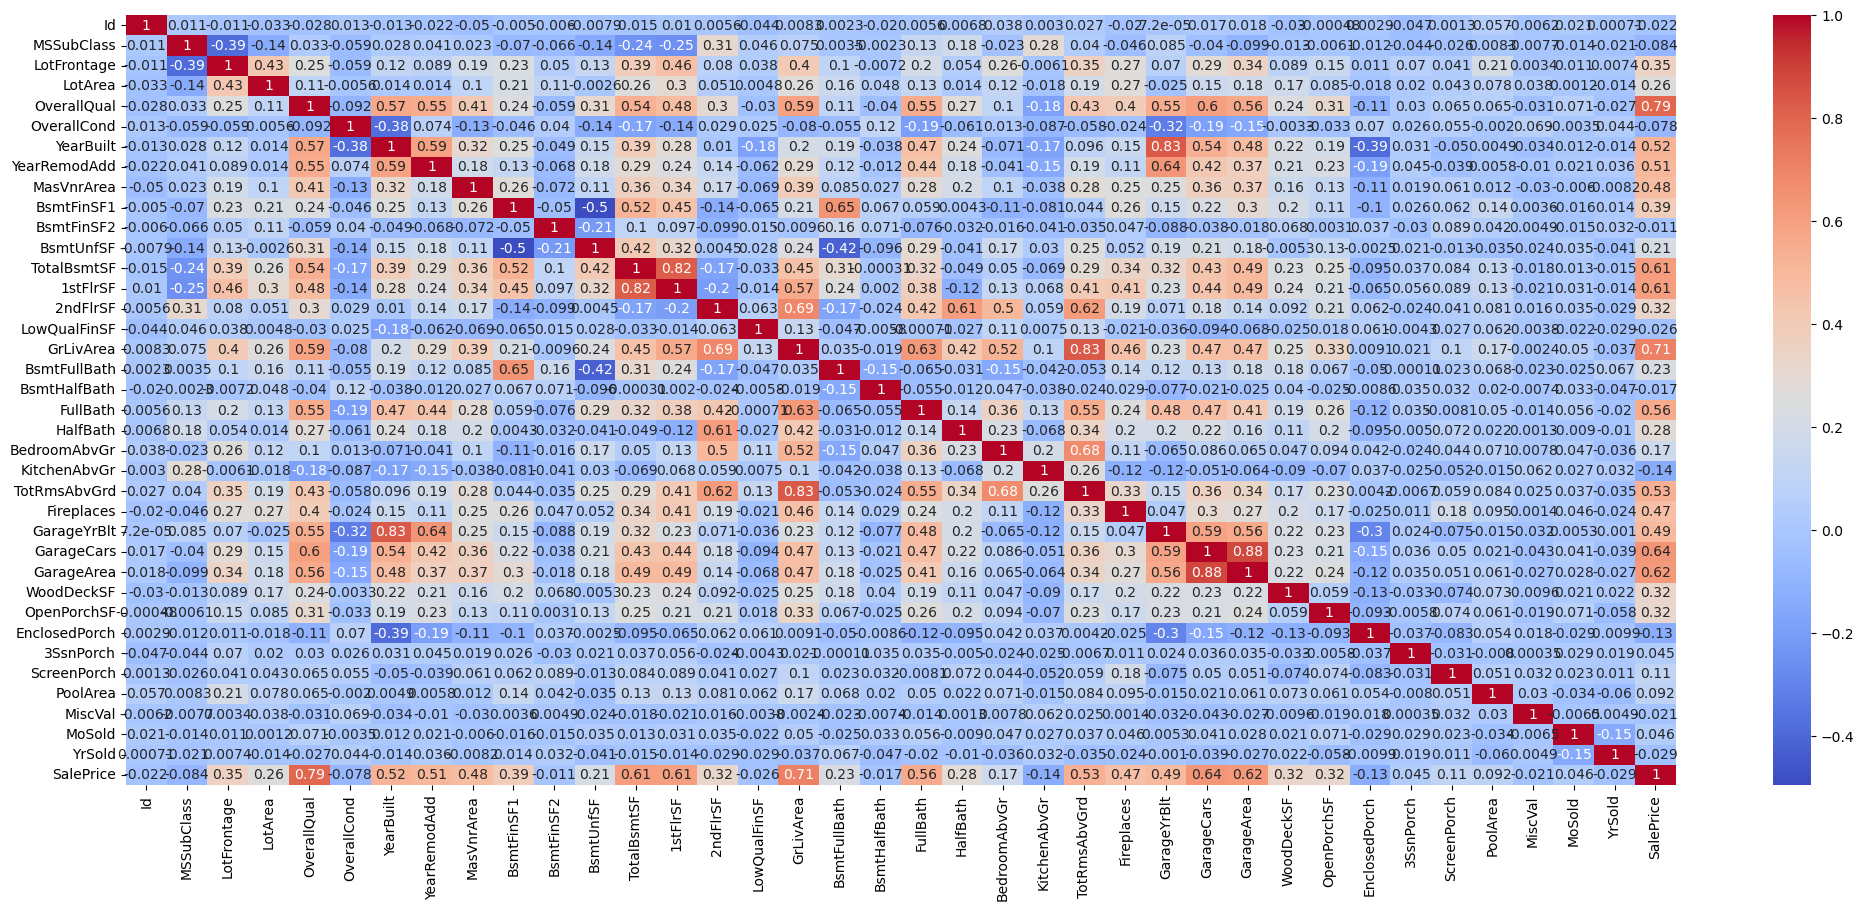

In [56]:
corr = dataframe.corr(numeric_only=True)
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [57]:
# Adding column with the strongest relationship with the target SalePrice.
y = dataframe['SalePrice']
X = dataframe[['OverallQual']]

In [58]:
# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train.head(5)

,OverallQual
254,5
1066,6
638,5
799,5
380,5


In [60]:
# StandardScaler: to transform data into same scale.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model training based on Linear Regression from scitkit learn

In [61]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [62]:
#Testing the model
y_pred = model.predict(X_test_scaled)

In [63]:
# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R²: {r2:.2f}')

MSE: 2681026163.51
R²: 0.65


Manual Gradient Descent to minimize w and b.

In [ ]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 1000
tmp_alpha = 5e-4
# run gradient descent
X_train_arr = X_train['OverallQual'].values.flatten()
w_final, b_final, J_hist, p_hist = gradient_descent(X_train_arr, y_train.values, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 1.87e+10  dj_dw: -1.194e+06, dj_db: -1.814e+05   w:  5.968e+02, b: 9.07208e+01
Iteration  100: Cost 1.65e+09  dj_dw: -1.565e+05, dj_db: -1.989e+04   w:  2.585e+04, b: 3.79968e+03
Iteration  200: Cost 1.36e+09  dj_dw: -2.104e+04, dj_db:  1.207e+03   w:  2.918e+04, b: 4.09372e+03
Iteration  300: Cost 1.35e+09  dj_dw: -3.340e+03, dj_db:  3.954e+03   w:  2.964e+04, b: 3.94211e+03
Iteration  400: Cost 1.35e+09  dj_dw: -1.026e+03, dj_db:  4.304e+03   w:  2.973e+04, b: 3.73271e+03
Iteration  500: Cost 1.35e+09  dj_dw: -7.227e+02, dj_db:  4.341e+03   w:  2.977e+04, b: 3.51622e+03
Iteration  600: Cost 1.35e+09  dj_dw: -6.817e+02, dj_db:  4.337e+03   w:  2.981e+04, b: 3.29923e+03
Iteration  700: Cost 1.35e+09  dj_dw: -6.750e+02, dj_db:  4.328e+03   w:  2.984e+04, b: 3.08261e+03
Iteration  800: Cost 1.35e+09  dj_dw: -6.727e+02, dj_db:  4.318e+03   w:  2.988e+04, b: 2.86648e+03
Iteration  900: Cost 1.35e+09  dj_dw: -6.711e+02, dj_db:  4.308e+03   w:  2.991e+04, b: 2.65085e+03


In [65]:
# calculating cost
X_train_arr = X_train['OverallQual'].values.flatten()

compute_cost(X_train_arr,y_train.values, w_final, b_final)

1345894865.0797832

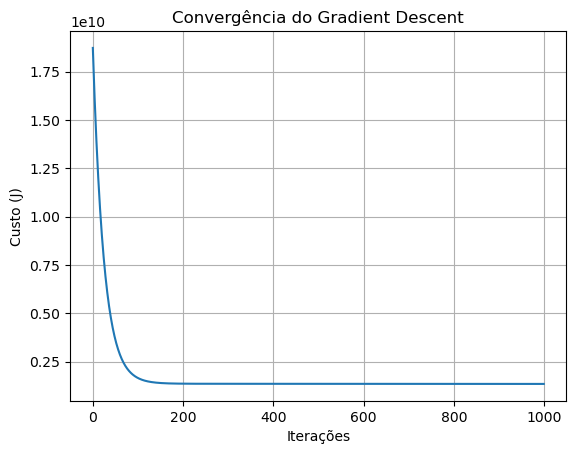

In [66]:
plt.plot(J_hist)
plt.xlabel('Iterações')
plt.ylabel('Custo (J)')
plt.title('Convergência do Gradient Descent')
plt.grid(True)
plt.show()

In [67]:
# Seus valores de w e b encontrados pelo gradient descent:
w_final = 44379.8532
b_final = -90233.0655

# Previsão manual usando w e b encontrados
y_pred_manual = w_final * X_test['OverallQual'].values + b_final

# MSE manual
from sklearn.metrics import mean_squared_error, r2_score
mse_manual = mean_squared_error(y_test, y_pred_manual)
r2_manual = r2_score(y_test, y_pred_manual)

print(f'MSE Gradient Descent: {mse_manual:.2f}')
print(f'R² Gradient Descent: {r2_manual:.2f}')


MSE Gradient Descent: 2681026619.32
R² Gradient Descent: 0.65


# Conclusion:

In this notebook, I developed a simple linear regression model to predict house sale prices using the "OverallQual" feature. I compared the manual implementation of gradient descent with scikit-learn's model and obtained similar results. This exercise helped me better understand the algorithms behind the models, which is essential for interpreting and improving my predictions.

# Conclusão:
(Português)
Neste notebook, desenvolvi um modelo simples de regressão linear para prever o preço de venda de imóveis usando a feature "OverallQual". Comparei a implementação manual do gradiente descendente com o modelo do scikit-learn e obtive resultados similares. Esse exercício me ajudou a entender melhor os algoritmos por trás dos modelos, o que é essencial para interpretar e melhorar minhas previsões.

